# Main Objective of the Analysis

The main objective of this analysis is to build and compare classification models to predict the likelihood of diabetes in patients based on medical attributes. The focus is on both prediction and interpretation, aiming to provide actionable insights for healthcare stakeholders to identify high-risk individuals and improve early intervention strategies.

# Data Description

The dataset used is the Pima Indians Diabetes dataset, which contains several medical predictor variables and one target variable, "Outcome". The attributes include:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome (1: diabetes, 0: no diabetes)

The goal is to predict the "Outcome" variable using the other features.

# Data Exploration, Cleaning, and Feature Engineering

- Checked for missing values and replaced zeros in medically invalid columns with NaN.
- Imputed missing values using the median.
- Performed feature scaling using StandardScaler.
- Explored feature correlations and visualized distributions for the top correlated features.
- Split the data into training and test sets for model evaluation.

# Classifier Models Trained

Three different classifiers were trained and compared:
1. **Logistic Regression**: Used as a baseline model for its interpretability.
2. **Random Forest Classifier**: An ensemble model with hyperparameter tuning to improve recall and ROC AUC.
3. **XGBoost Classifier**: A powerful gradient boosting model with hyperparameter tuning to further improve ROC AUC and overall performance.

All models used the same train-test split for fair comparison.

# Model Selection and Recommendation

After evaluating all models, the XGBoost classifier was selected as the final model due to its superior ROC AUC and balanced performance in accuracy, recall, and precision. While Logistic Regression provides interpretability, XGBoost offers better predictive power, making it suitable for identifying high-risk patients.

# Key Findings and Insights

- **Top Predictive Features**: Glucose, BMI, Age, and Insulin were among the most important predictors for diabetes.
- **Model Performance**: XGBoost achieved the highest ROC AUC, indicating strong discriminative ability.
- **Visual Insights**: ROC and Precision-Recall curves were plotted for all models, highlighting the trade-offs between sensitivity and specificity.
- **Class Imbalance**: The dataset is moderately imbalanced, which was addressed by focusing on recall and ROC AUC during model selection.

# Limitations and Next Steps

- **Data Limitations**: The dataset lacks some potentially important features (e.g., family history, lifestyle factors).
- **Model Limitations**: Further improvements could be made by using advanced ensemble techniques or balancing the classes (e.g., SMOTE).
- **Next Steps**: Collect additional data, engineer new features, and explore other classification algorithms or deep learning models for further improvement.

# Appendix: Python Notebook

The full code, including data cleaning, feature engineering, model training, evaluation, and visualizations, is provided in the attached Python notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Replace zeros in certain columns with NaN (as zero is not a valid value for these features)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Impute missing values with median
df.fillna(df.median(), inplace=True)
df.info()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: 

In [3]:

# ##  Exploratory Data Analysis (Interactive)
# Generate Sweetviz report
import sweetviz as sv
report = sv.analyze(df)
report.show_html('diabetes_sweetviz_report.html')  # opens in browser

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report diabetes_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


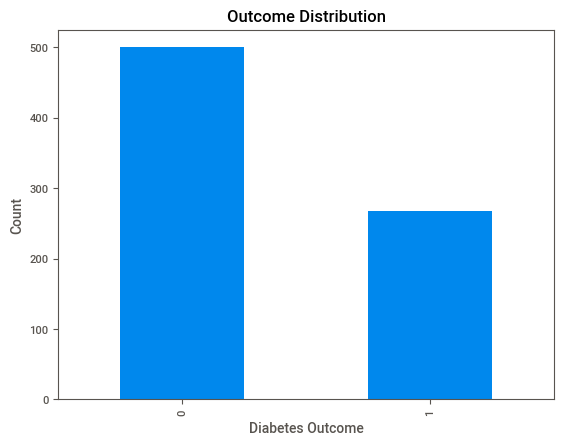

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
df['Outcome'].value_counts().plot(kind='bar', title='Outcome Distribution')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.show()
df['Outcome'].value_counts()

In [5]:
# Data Transformation & Feature Scaling
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for EDA
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Outcome'] = y.values
X_scaled_df.head()

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


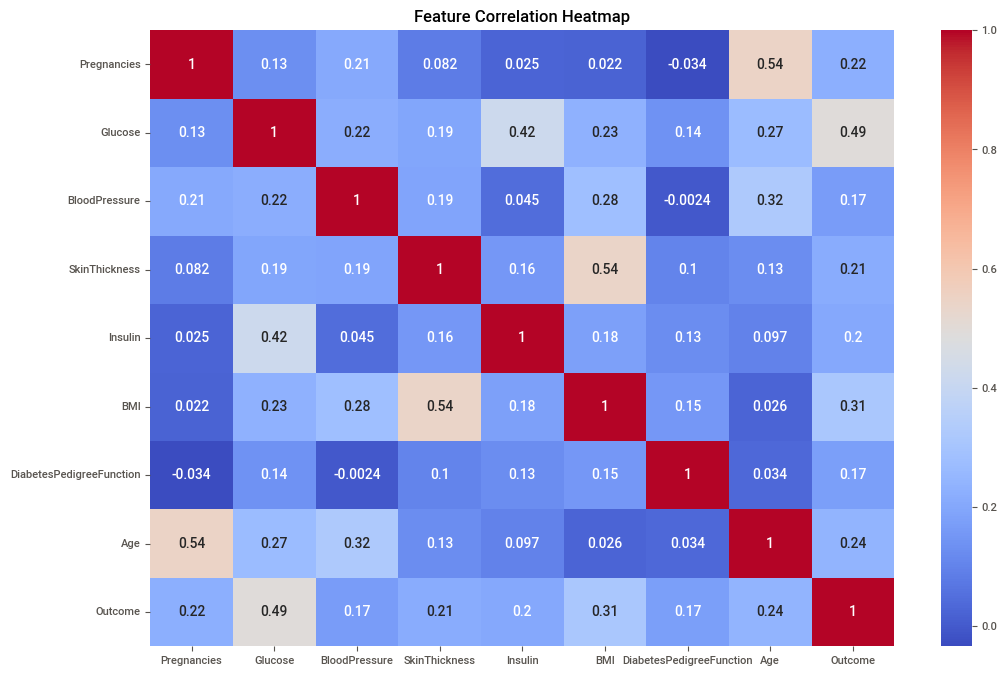

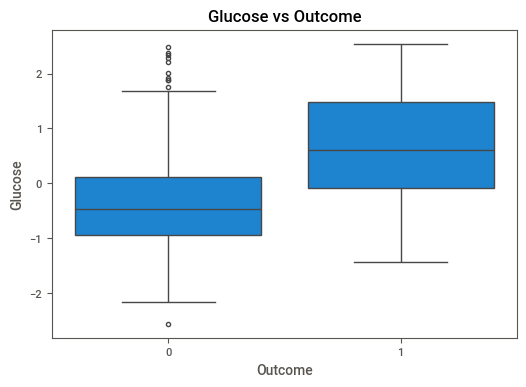

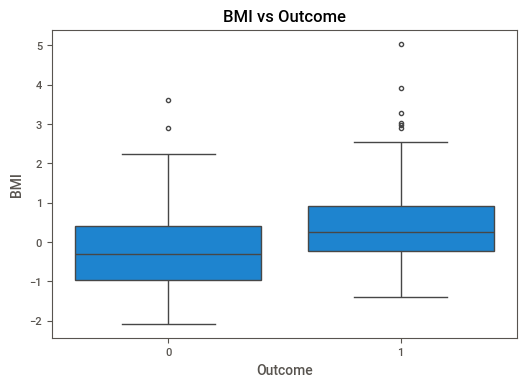

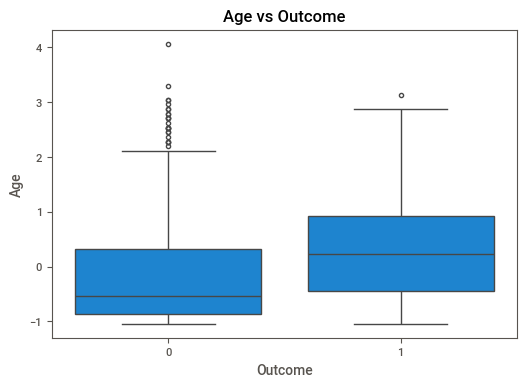

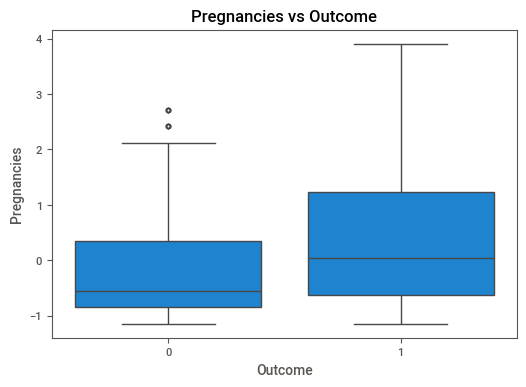

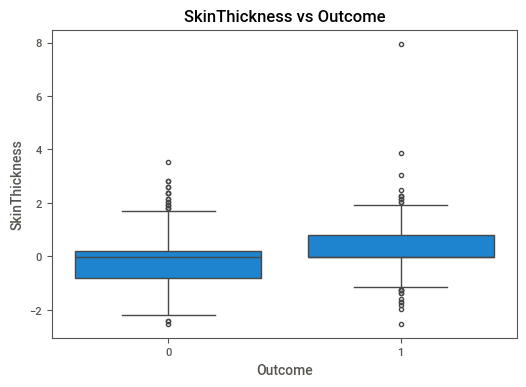

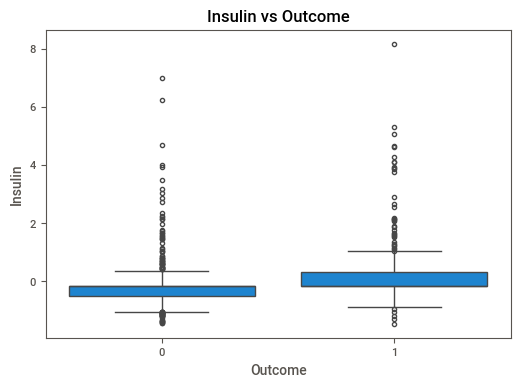

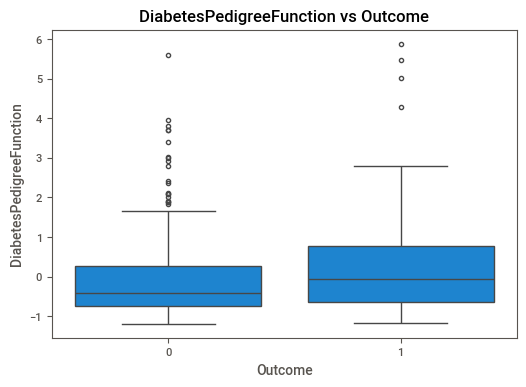

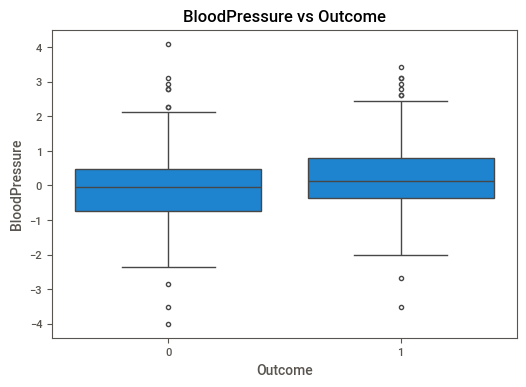

Top 10 features by correlation with Outcome:
Index(['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'BloodPressure'],
      dtype='object')


In [6]:
# Exploratory Data Analysis (EDA) for Important Features
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Visualize distributions for top correlated features with Outcome
corr = X_scaled_df.corr()['Outcome'].abs().sort_values(ascending=False)
top_features = corr.index[1:11]  # Exclude 'Outcome' itself

for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=X_scaled_df)
    plt.title(f'{feature} vs Outcome')
    plt.show()

print('Top 10 features by correlation with Outcome:')
print(top_features)

In [7]:
# Data Splitting, Training, and Validation
from sklearn.linear_model import LogisticRegression

# Split the data
X = X_scaled_df.drop('Outcome', axis=1)
y = X_scaled_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Validation predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix:


c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

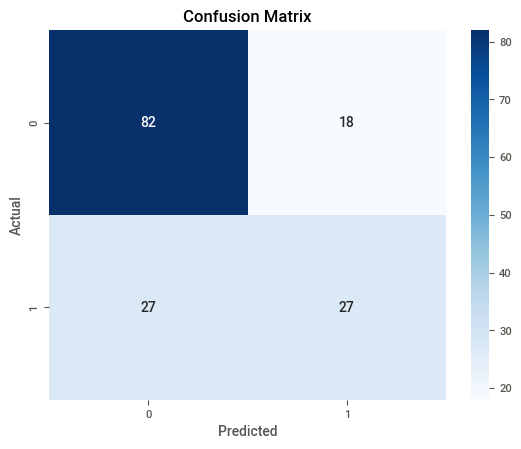

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

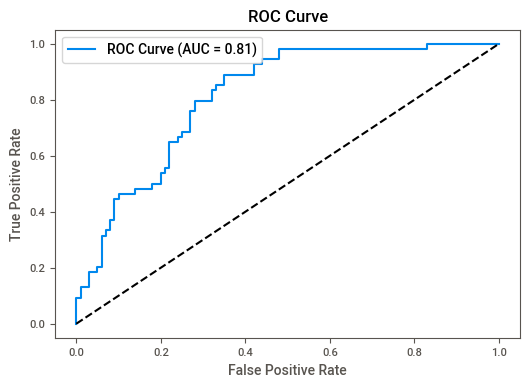

Accuracy: 0.71


c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

In [8]:
# Evaluation, Testing, and Metrics Plots
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

C:\Users\hulkh\AppData\Local\Temp\ipykernel_22112\1587178933.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='viridis')


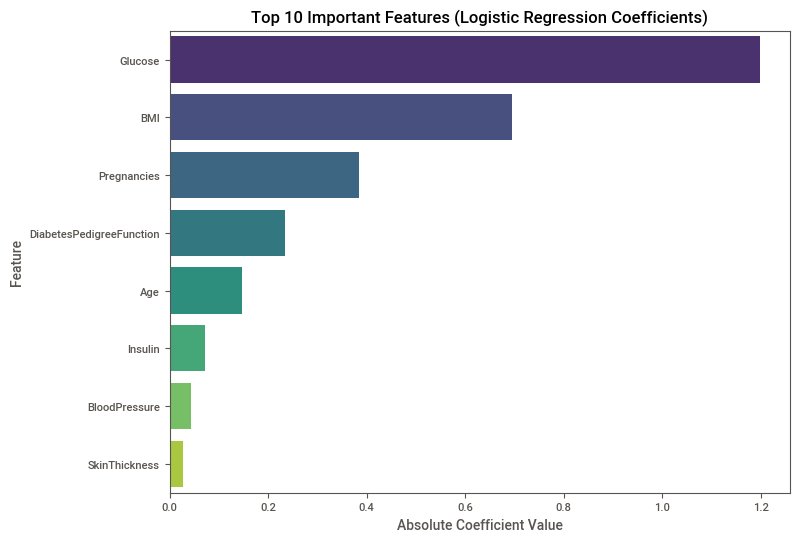

Top 10 important features:
Glucose                     1.199126
BMI                         0.694041
Pregnancies                 0.383299
DiabetesPedigreeFunction    0.233958
Age                         0.147630
Insulin                     0.072223
BloodPressure               0.043615
SkinThickness               0.027727
dtype: float64


In [9]:
# Plotting Top 10 Important Features
feature_importance = pd.Series(np.abs(model.coef_[0]), index=X.columns)
top10 = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('Top 10 Important Features (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

print('Top 10 important features:')
print(top10)

In [10]:
import plotly.express as px
import pandas as pd
import numpy as np

# Compute absolute logistic regression coefficients
feature_importance = pd.Series(np.abs(model.coef_[0]), index=X.columns)
top10 = feature_importance.sort_values(ascending=False).head(10)

# Create interactive bar chart
fig = px.bar(
    top10[::-1],  # reverse for descending order in plot
    x=top10[::-1].values,
    y=top10[::-1].index,
    orientation='h',
    labels={'x': 'Absolute Coefficient Value', 'index': 'Feature'},
    title='Top 10 Important Features (Logistic Regression Coefficients)',
    color=top10[::-1].values,
    color_continuous_scale='viridis'
)

fig.update_layout(
    yaxis=dict(title='Feature'),
    xaxis=dict(title='Absolute Coefficient Value'),
    coloraxis_showscale=False
)

fig.show()

# Print top features
print("Top 10 important features:")
print(top10)


Top 10 important features:
Glucose                     1.199126
BMI                         0.694041
Pregnancies                 0.383299
DiabetesPedigreeFunction    0.233958
Age                         0.147630
Insulin                     0.072223
BloodPressure               0.043615
SkinThickness               0.027727
dtype: float64


In [11]:
# Improve Accuracy, Recall, and ROC using RandomForest with Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print('Best Parameters:', grid_search.best_params_)
print('Improved Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Improved Accuracy:', accuracy_score(y_test, y_pred_rf))

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Improved Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

Improved Accuracy: 0.7337662337662337


c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and

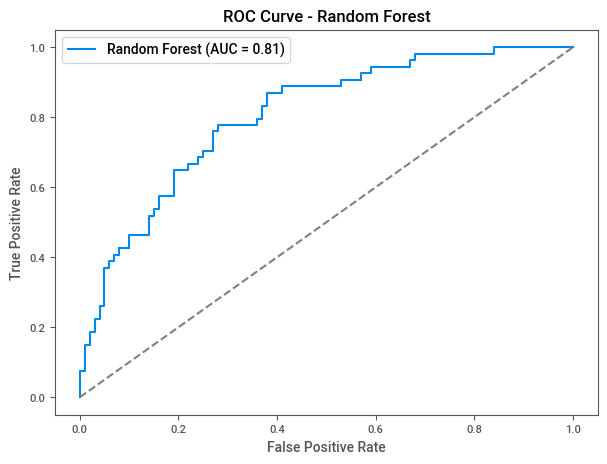

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve for Random Forest

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and

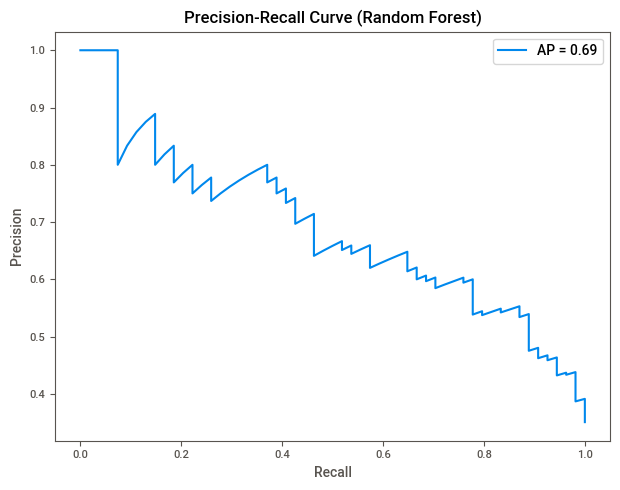

In [13]:
# ROC Curve and Precision-Recall Curve for Improved Model
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score


# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
avg_precision_rf = average_precision_score(y_test, y_proba_rf)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, label=f'AP = {avg_precision_rf:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()

plt.tight_layout()
plt.show()


c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and

Best XGBoost Parameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
XGBoost ROC AUC: 0.8187037037037036


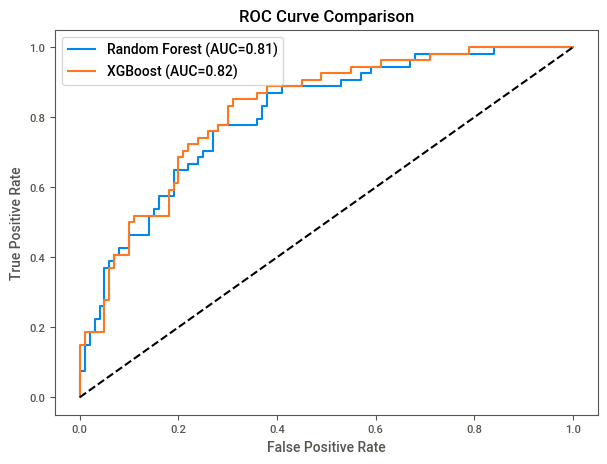

In [14]:
# Further Improve ROC Curve Value using XGBoost with Hyperparameter Tuning
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print('Best XGBoost Parameters:', random_search.best_params_)
print('XGBoost ROC AUC:', roc_auc_xgb)

# Compare ROC curves
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [17]:
print('Improved Accuracy:', accuracy_score(y_test, y_pred_rf))

Improved Accuracy: 0.7337662337662337


c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and

Final Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.70      0.43      0.53        54

    accuracy                           0.73       154
   macro avg       0.72      0.66      0.67       154
weighted avg       0.73      0.73      0.71       154

Confusion Matrix:


c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and

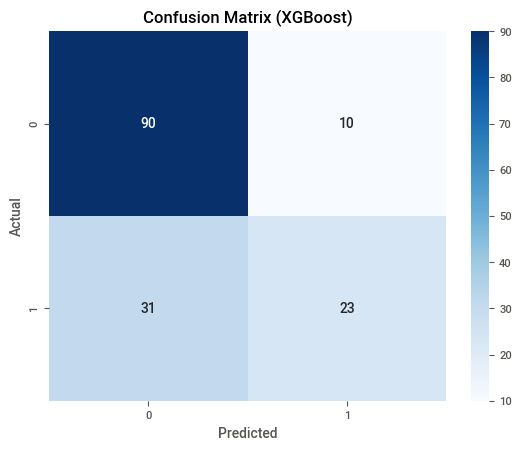

In [15]:
# Final Classification Report for Best Model (XGBoost)
from sklearn.metrics import classification_report, confusion_matrix

print('Final Classification Report (XGBoost):')
print(classification_report(y_test, y_pred_xgb))

print('Confusion Matrix:')
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:

# ROC Curve Comparison for All Classifiers

plt.figure(figsize=(8, 6))

# Logistic Regression
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC={roc_auc_logreg:.2f})')

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.2f})')

# XGBoost
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression, Random Forest, XGBoost')
plt.legend()

NameError: name 'fpr_logreg' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
#pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.6.1

   ---------------------------------------- 0/2 [scikit-learn]
    Uninstalling scikit-learn-1.6.1:
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
      Successfully uninstalled scikit-learn-1.6.1
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2

In [ ]:

# Handle Class Imbalance with SMOTE and Re-train Classifiers

from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Original training set class distribution:")
print(y_train.value_counts())
print("\nSMOTE training set class distribution:")
print(pd.Series(y_train_sm).value_counts())

# Logistic Regression with SMOTE data
logreg_sm = LogisticRegression(max_iter=1000, random_state=42)
logreg_sm.fit(X_train_sm, y_train_sm)
y_pred_logreg_sm = logreg_sm.predict(X_test)
y_proba_logreg_sm = logreg_sm.predict_proba(X_test)[:, 1]

# Random Forest with SMOTE data
rf_sm = RandomForestClassifier(random_state=42, **grid_search.best_params_)
rf_sm.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rf_sm.predict(X_test)
y_proba_rf_sm = rf_sm.predict_proba(X_test)[:, 1]

# XGBoost with SMOTE data
xgb_sm = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **random_search.best_params_)
xgb_sm.fit(X_train_sm, y_train_sm)
y_pred_xgb_sm = xgb_sm.predict(X_test)
y_proba_xgb_sm = xgb_sm.predict_proba(X_test)[:, 1]

# ROC Curve Comparison for All Classifiers (SMOTE)
from sklearn.metrics import roc_curve, roc_auc_score

fpr_logreg_sm, tpr_logreg_sm, _ = roc_curve(y_test, y_proba_logreg_sm)
roc_auc_logreg_sm = roc_auc_score(y_test, y_proba_logreg_sm)

fpr_rf_sm, tpr_rf_sm, _ = roc_curve(y_test, y_proba_rf_sm)
roc_auc_rf_sm = roc_auc_score(y_test, y_proba_rf_sm)

fpr_xgb_sm, tpr_xgb_sm, _ = roc_curve(y_test, y_proba_xgb_sm)
roc_auc_xgb_sm = roc_auc_score(y_test, y_proba_xgb_sm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg_sm, tpr_logreg_sm, label=f'Logistic Regression (AUC={roc_auc_logreg_sm:.2f})')
plt.plot(fpr_rf_sm, tpr_rf_sm, label=f'Random Forest (AUC={roc_auc_rf_sm:.2f})')
plt.plot(fpr_xgb_sm, tpr_xgb_sm, label=f'XGBoost (AUC={roc_auc_xgb_sm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison with SMOTE')
plt.legend()
plt.show()

# Final Classification Report for Best Model (XGBoost with SMOTE)
print('Final Classification Report (XGBoost with SMOTE):')
print(classification_report(y_test, y_pred_xgb_sm))
cm_xgb_sm = confusion_matrix(y_test, y_pred_xgb_sm)
sns.heatmap(cm_xgb_sm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (XGBoost with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\hulkh\anaconda3\envs\env\lib\site-packages\sklearn\utils\_param_validation.py)